# Ch6 - Possible problem in AI training and Solution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

(List the possible problems & solution encountered during training AI network)

## Neural network training

### Introduction

In the following of the notebook, we are using the *Iris flower dataset* for training.
(Explanation on the data, the components of data, no of data)

(The structure of the AI model, activation function & output layer function in between, optimization methods and loss function, batch size, test case,  )

### Data preparation

Below are the steps of data preparation,

1. Load the data from *sklearn* module
2. Normalization
3. Convert the label for training (Understand why do we need to do this)
4. Split the train and test case

In [ ]:
from sklearn import datasets

iris_data = datasets.load_iris()
input_data = iris_data.data
correct = iris_data.target

no_of_data = len(correct)

In [ ]:
# Print the first 10 data & take a look of the data
print(input_data[:10,])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [ ]:
# Normalization
mean_col = np.mean(input_data,axis=0)
std_col = np.std(input_data,axis=0)
input_data = (input_data - mean_col)/(std_col)

Turn the `correct` to one-hot labelling (Add the graph of one-hot labelling scheme & why do we need to turn it to one-hot)

In [ ]:
# Turn the `correct` to one-hot labelling
correct_data = np.zeros((no_of_data,3))

# TODO: Figure out a way to make use the vectorization
for i in range(no_of_data):
    correct_data[i, correct[i]] = 1.0

In [ ]:
# Split the data to test & learn case

"""
from sklearn.model_selection import train_test_split

input_train, input_test, correct_train, correct_test = train_test_split(
    normalized_data,
    correct_data,
    test_size=no_of_data//2
)

n_train = len(input_train)
n_test = len(input_test)
"""

'\nfrom sklearn.model_selection import train_test_split\n\ninput_train, input_test, correct_train, correct_test = train_test_split(\n    normalized_data,\n    correct_data,\n    test_size=no_of_data//2\n)\n\nn_train = len(input_train)\nn_test = len(input_test)\n'

In [ ]:
index = np.arange(no_of_data)
index_train = index[index%2 == 0]
index_test = index[index%2 != 0]

input_train = input_data[index_train, :]  # 訓練 輸入
correct_train = correct_data[index_train, :]  # 訓練 正確答案
input_test = input_data[index_test, :]  # 測試 輸入
correct_test = correct_data[index_test, :]  # 測試 正確答案

n_train = input_train.shape[0] # 訓練資料的樣本數
n_test = input_test.shape[0]   # 測試資

### Network structure

1. Define the hyperparameters & initial vaules for the network
2. Define the layer structure as object
3. Forward and back propagation definition


In [ ]:
# Nework neuron
n_in = 4 # since we get 4 features for each x
n_mid = 25
n_out = 3

eta = 0.01      # learning rate for SGD
epoch = 1000    # No of training times
batch_size = 8

interval = 100  # Showing the training accuracy every (interval) times

(ReLu definition, Softmax expression)

In [ ]:
# Define the layer structure & methods

# Define the common properities in BaseLayer
class BaseLayer:
  def __init__(self,n_upper,n, wb_width=0.1): # n_upper - no of neurons in last layer, n - no of neurons
    self.w = wb_width * np.random.randn(n_upper, n)
    self.b = wb_width * np.random.randn(n)

  def update(self,eta):
    self.w -= eta * self.grad_w
    self.b -= eta * self.grad_b

# Middle layer
class MiddleLayer(BaseLayer):
  def forward(self, x):
    self.x = x
    self.u = np.dot(x, self.w) + self.b
    self.y = np.where(self.u<=0, 0, self.u) # ReLu activation function ]

  def backward(self,grad_y):
    delta = grad_y * np.where(self.u<=0, 0, 1) # grad_y * derivative of ReLu

    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)

    self.grad_x = np.dot(delta, self.w.T)

# Output layer
class OutputLayer(BaseLayer):
  def forward(self,x):
    self.x = x
    u = np.dot(x, self.w) + self.b
    self.y = np.exp(u)/np.sum(np.exp(u),axis=1,keepdims=True)

  def backward(self,t):
    delta = self.y - t

    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)

    self.grad_x = np.dot(delta, self.w.T)


In [ ]:
# Neural network structure

middle_layer_1 = MiddleLayer(n_in, n_mid)
middle_layer_2 = MiddleLayer(n_mid, n_mid)
output_layer = OutputLayer(n_mid,n_out)

In [ ]:
# Group the forward, backward propagation, update_weight of different layer in the function

def forward_propagation(x):
  middle_layer_1.forward(x)
  middle_layer_2.forward(middle_layer_1.y)
  output_layer.forward(middle_layer_2.y)

def backward_propagation(t):
  output_layer.backward(t)
  middle_layer_2.backward(output_layer.grad_x)
  middle_layer_1.backward(middle_layer_2.grad_x)

def update_wb(eta=0.01):
  middle_layer_1.update(eta)
  middle_layer_2.update(eta)
  output_layer.update(eta)

def get_error(t, batch_size):
  # Basically calcaluating the cost function value and normalize with the batch size
  # add 1e-7 to avoid ln(0)
  return -np.sum(t * np.log(output_layer.y + 1e-7))/batch_size

### Training procedures

In [ ]:
train_error = []
test_error = []
interval = 100

no_of_batch = n_train // batch_size

for i in range(epoch):

  # Record the error on training & test case in every training
  forward_propagation(input_train)
  train_error.append(get_error(correct_train, n_train))

  forward_propagation(input_test)
  test_error.append(get_error(correct_test, n_test))

  if i%interval == 0:
    print("Epoch:" + str(i) + "/" + str(epoch),
              f"Error_train:{train_error[-1]}",
              f"Error_test:{test_error[-1]}")

  # Shuffle the data & prepare the index
  index_random = np.arange(n_train)
  np.random.shuffle(index_random)

  for j in range(no_of_batch):

    mini_batch_index = index_random[j*batch_size:(j+1)*batch_size]
    x = input_train[mini_batch_index, :]
    t = correct_train[mini_batch_index, :]

    forward_propagation(x)
    backward_propagation(t)
    update_wb(eta)

Epoch:0/1000 Error_train:1.0968199039856892 Error_test:1.097538506665832
Epoch:100/1000 Error_train:0.024155309428870095 Error_test:0.06816470656647172
Epoch:200/1000 Error_train:0.008415673163448071 Error_test:0.09503874860869804
Epoch:300/1000 Error_train:0.0033292618019219785 Error_test:0.1222124216622257
Epoch:400/1000 Error_train:0.0017992324718631694 Error_test:0.14185531560093045
Epoch:500/1000 Error_train:0.001165790061656114 Error_test:0.1566416562099421
Epoch:600/1000 Error_train:0.0008371845906636736 Error_test:0.16878736420251012
Epoch:700/1000 Error_train:0.000634923347089403 Error_test:0.17907457064084312
Epoch:800/1000 Error_train:0.0005070199170607777 Error_test:0.18805048559036963
Epoch:900/1000 Error_train:0.0004172960531196517 Error_test:0.19610355002133253


Text(0, 0.5, 'Error')

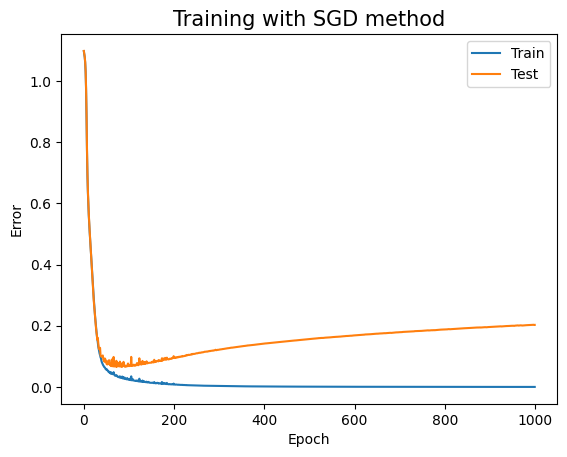

In [ ]:
# Visualize the training process
import matplotlib.pyplot as plt

plt.title("Training with SGD method",fontsize=15)
plt.plot(np.arange(epoch), train_error, label="Train")
plt.plot(np.arange(epoch), test_error, label="Test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Error")


In [ ]:
forward_propagation(input_train)
count_train = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_train, axis=1))

forward_propagation(input_test)
count_test = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_test, axis=1))

print("Accuracy Train:", str(count_train/n_train*100) + "%",
      "Accuracy Test:", str(count_test/n_test*100) + "%")

Accuracy Train: 100.0% Accuracy Test: 94.66666666666667%


It is clear from the plot the overfitting problem occurs. The different in error between the train & test case becomes larger after `epoch=100`.

## Methods dealing with overfitting

In the following of the section, we are going to implement 2 methods to deal with overfitting.

1. Changing Stochastic Gradient Descent (SGD) to Adaptive Gradient Descent (AdaGrad)
2. Add the dropout layer in between the different layer

### Adaptive Gradient Descent

In [ ]:
# Redefine the BaseLayer object to support AdaGrad

# Define the common properities in BaseLayer
class BaseLayer:
  def __init__(self,n_upper,n, wb_width = 0.1): # n_upper - no of neurons in last layer, n - no of neurons
    self.w = wb_width * np.random.randn(n_upper, n)
    self.b = wb_width * np.random.randn(n)

    self.h_w = np.zeros((n_upper, n)) + 1e-8 # add 1e-8 to avoid division by 0
    self.h_b = np.zeros((n)) + 1e-8

  def update(self,eta):
    self.w -= eta * self.grad_w
    self.b -= eta * self.grad_b

  def update_AdaGrad(self,eta):
    self.h_w += np.square(self.grad_w)
    self.w -= eta / np.sqrt(self.h_w) * self.grad_w

    self.h_b += np.square(self.grad_b)
    self.b -= eta / np.sqrt(self.h_b) * self.grad_b

# Middle layer
class MiddleLayer(BaseLayer):
  def forward(self, x):
    self.x = x
    self.u = np.dot(x, self.w) + self.b
    self.y = np.where(self.u<=0, 0, self.u) # ReLu activation function ]

  def backward(self,grad_y):
    delta = grad_y * np.where(self.u<=0, 0, 1) # grad_y * derivative of ReLu

    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)

    self.grad_x = np.dot(delta, self.w.T)

# Output layer
class OutputLayer(BaseLayer):
  def forward(self,x):
    self.x = x
    self.u = np.dot(x, self.w) + self.b
    self.y = np.exp(self.u)/(np.sum(np.exp(self.u),axis=1,keepdims=True))

  def backward(self,t):
    delta = self.y - t

    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)

    self.grad_x = np.dot(delta, self.w.T)


In [ ]:
def update_wb_AdaGrad(eta):
    middle_layer_1.update_AdaGrad(eta)
    middle_layer_2.update_AdaGrad(eta)
    output_layer.update_AdaGrad(eta)

In [ ]:
# Redine the network structure

middle_layer_1 = MiddleLayer(n_in, n_mid)
middle_layer_2 = MiddleLayer(n_mid, n_mid)
output_layer = OutputLayer(n_mid,n_out)

In [ ]:
# Training - With AdaGrad

# TODO: Ammend the following code in next session

train_error = []

test_error = []

no_of_batch = n_train // batch_size

for i in range(epoch):

  # Record the error on training & test case in every training
  forward_propagation(input_train)
  train_error.append(get_error(correct_train, n_train))

  forward_propagation(input_test)
  test_error.append(get_error(correct_test, n_test))

  # Shuffle the data & prepare the index
  index_random = np.arange(n_train)
  np.random.shuffle(index_random)

  for j in range(no_of_batch):

    mini_batch_index = index_random[j*batch_size:(j+1)*batch_size]
    x = input_train[mini_batch_index, :]
    t = correct_train[mini_batch_index, :]

    forward_propagation(x)
    backward_propagation(t)
    update_wb_AdaGrad(eta)

Text(0, 0.5, 'Error')

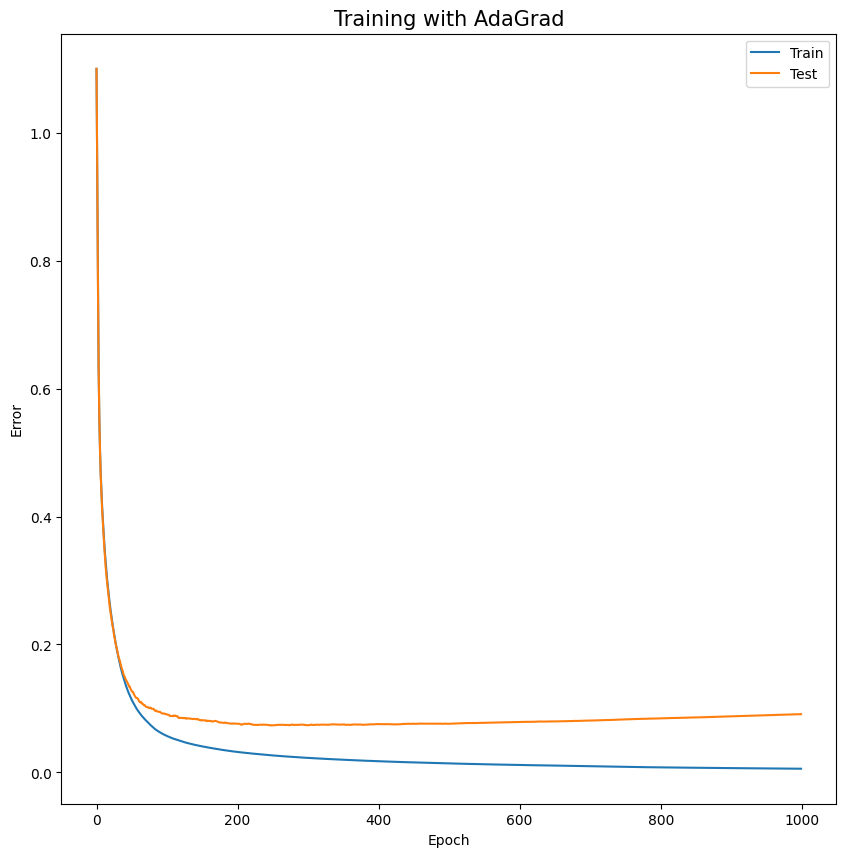

In [ ]:
# Visualize the training process
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title("Training with AdaGrad",fontsize=15)
plt.plot(np.arange(epoch), train_error, label="Train")
plt.plot(np.arange(epoch), test_error, label="Test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Error")

In [ ]:
forward_propagation(input_train)
count_train = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_train, axis=1))

forward_propagation(input_test)
count_test = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_test, axis=1))

print("Accuracy Train:", str(count_train/n_train*100) + "%",
      "Accuracy Test:", str(count_test/n_test*100) + "%")

Accuracy Train: 100.0% Accuracy Test: 93.33333333333333%


### Dropout Layer

(How do you implement the dropout layer)

In [ ]:
# Redefine the BaseLayer object to support AdaGrad

# Define the common properities in BaseLayer
class BaseLayer:
  def __init__(self,n_upper,n, wb_width = 0.1): # n_upper - no of neurons in last layer, n - no of neurons
    self.w = wb_width * np.random.randn(n_upper, n)
    self.b = wb_width * np.random.randn(n)

    self.h_w = np.zeros((n_upper, n)) + 1e-8 # add 1e-8 to avoid division by 0
    self.h_b = np.zeros((n)) + 1e-8

  def update(self,eta):
    self.w -= eta * self.grad_w
    self.b -= eta * self.grad_b

  def update_AdaGrad(self,eta):
    self.h_w += np.square(self.grad_w)
    self.w -= eta / np.sqrt(self.h_w) * self.grad_w

    self.h_b += np.square(self.grad_b)
    self.b -= eta / np.sqrt(self.h_b) * self.grad_b

# Middle layer
class MiddleLayer(BaseLayer):
  def forward(self, x):
    self.x = x
    self.u = np.dot(x, self.w) + self.b
    self.y = np.where(self.u<=0, 0, self.u) # ReLu activation function ]

  def backward(self,grad_y):
    delta = grad_y * np.where(self.u<=0, 0, 1) # grad_y * derivative of ReLu

    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)

    self.grad_x = np.dot(delta, self.w.T)

# Output layer
class OutputLayer(BaseLayer):
  def forward(self,x):
    self.x = x
    self.u = np.dot(x, self.w) + self.b
    self.y = np.exp(self.u)/(np.sum(np.exp(self.u),axis=1,keepdims=True))

  def backward(self,t):
    delta = self.y - t

    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)

    self.grad_x = np.dot(delta, self.w.T)


In [ ]:
class Dropout:
    def __init__(self, dropout_ratio):
        self.dropout_ratio = dropout_ratio

    def forward(self, x, is_train_flag):

        if is_train_flag: # only use the dropout layer during training. Switch this when testing

            rand_matrix = np.random.rand(*x.shape) # Generate matrix with same shape as x and no in [0,1]
            self.dropout = np.where(rand_matrix >self.dropout_ratio ,1,0)
            self.y = x * self.dropout

        else:
            self.y = (1 - self.dropout_ratio)*x # To maintain the same proportionn of the data for testing

    def backward(self, grad_y):
        self.grad_x = grad_y * self.dropout # Only pass the value of neuron that has not been dropped out in the forward propagation

In [ ]:
#　Redefine the neural network neruon unit

n_in = 4
n_mid = 50
n_out = 3

In [ ]:
# Redine the network structure

middle_layer_1 = MiddleLayer(n_in, n_mid)
dropout_1 = Dropout(0.5)

middle_layer_2 = MiddleLayer(n_mid, n_mid)
dropout_2 = Dropout(0.5)

output_layer = OutputLayer(n_mid,n_out)

In [ ]:
# Redefine the way for doing forward and backward propagation

def forward_propagation(x,is_train_flag):
    middle_layer_1.forward(x)
    dropout_1.forward(middle_layer_1.y,is_train_flag)

    middle_layer_2.forward(dropout_1.y)
    dropout_2.forward(middle_layer_2.y,is_train_flag)

    output_layer.forward(dropout_2.y)

def backward_propagation(t):
    output_layer.backward(t)

    dropout_2.backward(output_layer.grad_x)
    middle_layer_2.backward(dropout_2.grad_x)

    dropout_1.backward(middle_layer_2.grad_x)
    middle_layer_1.backward(dropout_1.grad_x)

def update_wb_AdaGrad(eta):
    middle_layer_1.update_AdaGrad(eta)
    middle_layer_2.update_AdaGrad(eta)
    output_layer.update_AdaGrad(eta)
    #update_AdaGrad

In [ ]:
# Training - With AdaGrad + Dropout

train_error = []

test_error = []

no_of_batch = n_train // batch_size

for i in range(epoch):

  # Record the error on training & test case in every training
  forward_propagation(input_train,is_train_flag=False)    # would not use dropout layer when predicting / calculating the error
  train_error.append(get_error(correct_train, n_train))

  forward_propagation(input_test,is_train_flag=False)
  test_error.append(get_error(correct_test, n_test))

  # Shuffle the data & prepare the index
  index_random = np.arange(n_train)
  np.random.shuffle(index_random)

  for j in range(no_of_batch):

    mini_batch_index = index_random[j*batch_size:(j+1)*batch_size]
    x = input_train[mini_batch_index, :]
    t = correct_train[mini_batch_index, :]

    forward_propagation(x,is_train_flag=True)
    backward_propagation(t)
    update_wb_AdaGrad(eta)

Text(0, 0.5, 'Error')

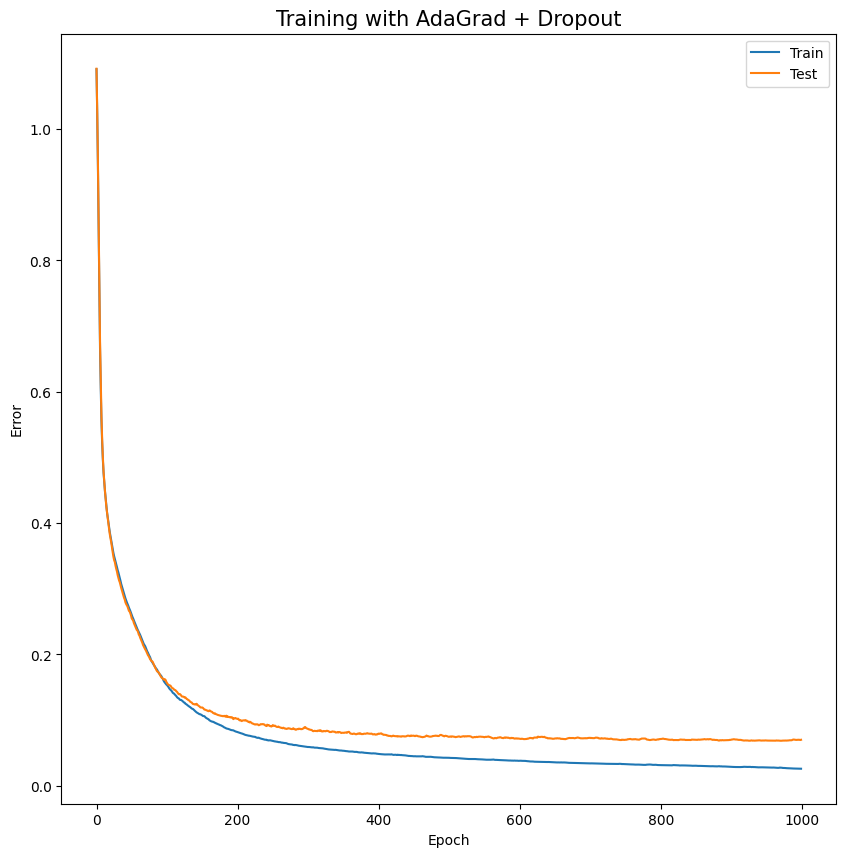

In [ ]:
# Visualize the training process
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title("Training with AdaGrad + Dropout",fontsize=15)
plt.plot(np.arange(epoch), train_error, label="Train")
plt.plot(np.arange(epoch), test_error, label="Test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Error")

In [ ]:
forward_propagation(input_train,is_train_flag=False)
count_train = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_train, axis=1))

forward_propagation(input_test,is_train_flag=False)
count_test = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_test, axis=1))

print("Accuracy Train:", str(count_train/n_train*100) + "%",
      "Accuracy Test:", str(count_test/n_test*100) + "%")

Accuracy Train: 100.0% Accuracy Test: 97.33333333333334%


## Implementation of the same model with Pytorch Library

### Prepare the data (again)

In [185]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [186]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [187]:
# Input and normalized the data

iris_data = datasets.load_iris()
input_data = iris_data.data
correct = iris_data.target

no_of_data = len(correct)

In [188]:
input_train, input_test, correct_train, correct_test = train_test_split(
    input_data,
    correct,
    test_size=0.5
)

In [189]:
# Normalize the data with sckit learn
scaler = StandardScaler()

input_train = scaler.fit_transform(input_train)
input_test = scaler.transform(input_test)

In [190]:
# Convert them to Torch Tensor
X_train = torch.FloatTensor(input_train)
X_test = torch.FloatTensor(input_test)
t_train = torch.LongTensor(correct_train)
t_test = torch.LongTensor(correct_test)

# Group into the DataLoader
train_dataset = TensorDataset(X_train, t_train)
test_dataset = TensorDataset(t_train, t_test)

batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Define the neural network structure

In [191]:
class SimpleFNNClassificationModel(nn.Module):
    def __init__(self, n_in, n_mid, n_out):
        super(SimpleFNNClassificationModel, self).__init__()
        self.middle_layer_1 = nn.Linear(n_in, n_mid)
        self.middle_layer_2 = nn.Linear(n_mid, n_mid)
        self.output_layer = nn.Linear(n_mid, n_out)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.middle_layer_1(x))
        x = self.relu(self.middle_layer_2(x))
        x = self.softmax(self.output_layer(x))
        return x

In [192]:
# Define the error calculation function
def get_error(output, target, batch_size):
    # Calculate the cost function value and normalize with the batch size
    # Add 1e-7 to avoid ln(0)
    return -torch.sum(target * torch.log(output + 1e-7)) / batch_size

In [193]:
input_dim  = 4
output_dim = 3
n_mid = 25
model = SimpleFNNClassificationModel(input_dim,n_mid,output_dim)

In [194]:
learning_rate = 0.01
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [201]:
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):

        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()

        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)

        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()

        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        # Record the train loss and test loss
        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [202]:
num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [203]:
train_network(model,optimizer,loss_function,X_train,t_train,X_test,t_test,num_epochs,train_losses,test_losses)

Epoch 100/1000, Train Loss: 1.0774, Test Loss: 1.0787
Epoch 200/1000, Train Loss: 1.0553, Test Loss: 1.0577
Epoch 300/1000, Train Loss: 1.0203, Test Loss: 1.0240
Epoch 400/1000, Train Loss: 0.9728, Test Loss: 0.9780
Epoch 500/1000, Train Loss: 0.9281, Test Loss: 0.9350
Epoch 600/1000, Train Loss: 0.8951, Test Loss: 0.9040
Epoch 700/1000, Train Loss: 0.8695, Test Loss: 0.8808
Epoch 800/1000, Train Loss: 0.8489, Test Loss: 0.8626
Epoch 900/1000, Train Loss: 0.8328, Test Loss: 0.8484
Epoch 1000/1000, Train Loss: 0.8199, Test Loss: 0.8372


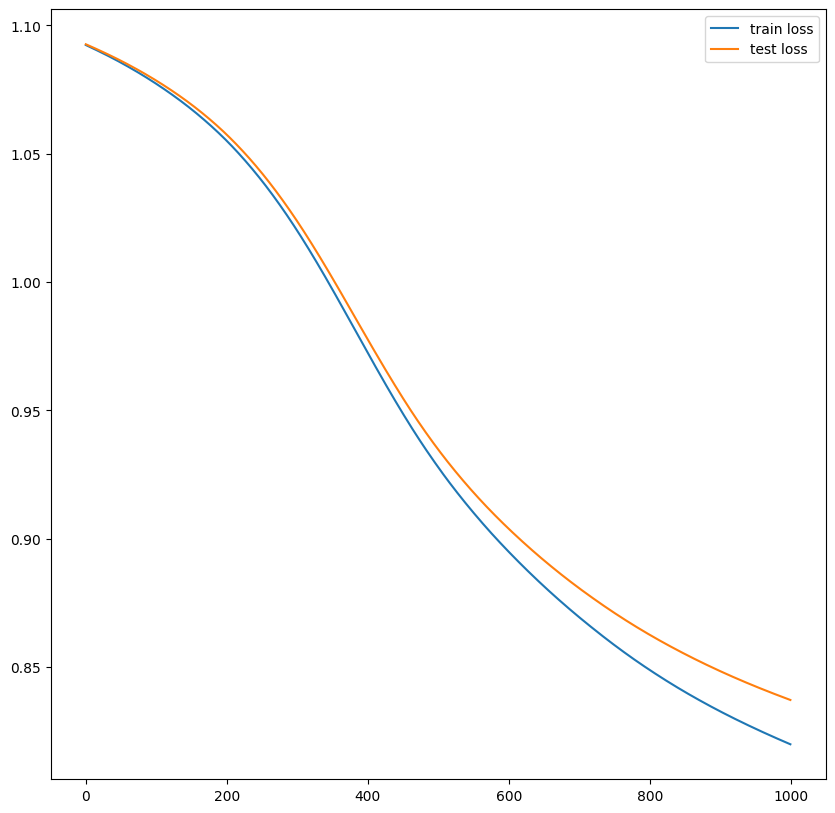

In [204]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()